In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('/content/spam.csv',encoding='latin-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3063,ham,Ok. How many should i buy.,NaN,NaN,NaN
4334,ham,"Now u sound like manky scouse boy steve,like! ...",NaN,NaN,NaN
346,ham,Dis is yijue. I jus saw ur mail. In case huimi...,NaN,NaN,NaN
914,ham,"Call me da, i am waiting for your call.",NaN,NaN,NaN
1138,ham,What * u wearing?,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

## Steps to be performed
1. Data cleaning
2. EDA
3. Text preprocessing
4. Model building
5. Evaluation
6. Improvement
7. website
8. deployment

In [6]:
# Step-1 ---->>> Data Cleaning

In [7]:
df.info() # as we can see there are lots of value are missing in unnamed:2,3,4 cols, so we are going to drop directley.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
# dropping last 3  cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
# rename the columns name v1 and v2 as they are not very descriptive
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [10]:
df.sample(2)

,target,text
431,ham,Does she usually take fifteen fucking minutes ...
1360,ham,Yo dude guess who just got arrested the other day


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target']=encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
#duplicate values
df.duplicated().sum()

403

In [16]:
# remove duplicate values
df=df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

0

## Step-2 EDA

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


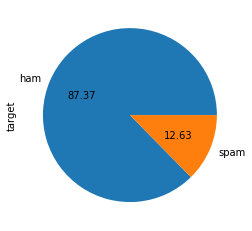

In [19]:
df['target'].value_counts().plot(kind='pie',autopct='%.2f',labels=['ham','spam'])

### **Data is Imbalanced`**

In [20]:
import nltk

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [22]:
len(df['text'][1])

29

In [23]:
#findout length of text
df['num_characters'] = df['text'].apply(len)

In [24]:
df.head(2)

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29


In [25]:
# featch Num of words
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [26]:
df.head(2)

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8


In [27]:
# Number of sentences
df['num_sentences']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [28]:
df.head(2)

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2


In [29]:
df.describe()

,target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.286129,1.961308
std,0.332253,58.236293,13.226400,1.432583
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,219.000000,38.000000


In [30]:
# ham 
df[df['target']==0].describe()

,target,num_characters,num_words,num_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,16.957484,1.815545
std,0.0,56.358207,13.394052,1.364098
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,219.000000,38.000000


In [31]:
#spam
df[df['target']==1].describe()

,target,num_characters,num_words,num_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.474732,2.969372
std,0.0,30.137753,6.893007,1.488910
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,44.000000,9.000000


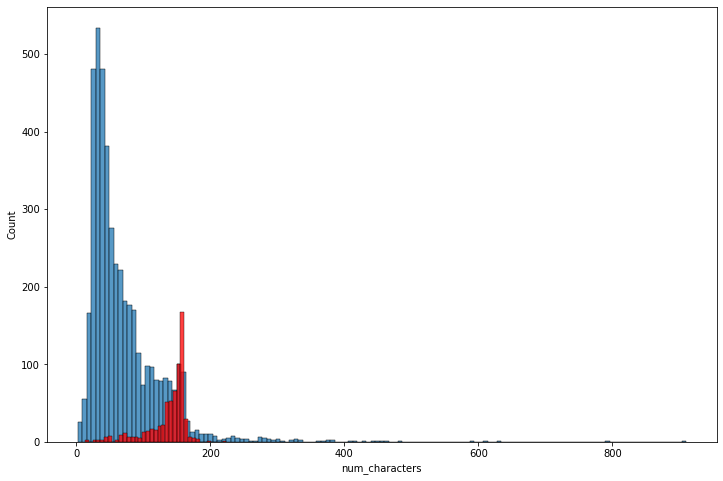

In [32]:
plt.figure(figsize =(12,8))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color = 'red')

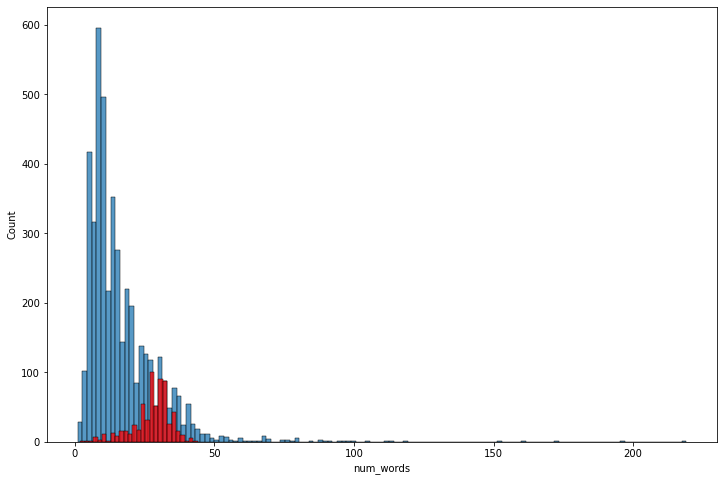

In [33]:
plt.figure(figsize =(12,8))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color = 'red')

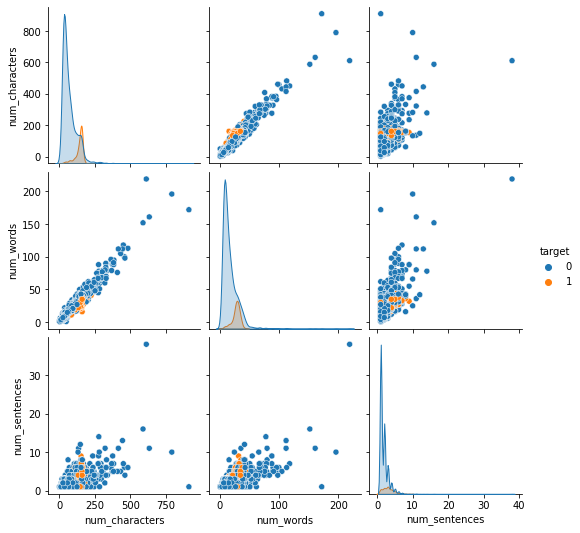

In [34]:
sns.pairplot(df,hue='target')

In [35]:
df.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.264198,0.267602
num_characters,0.384717,1.000000,0.965307,0.626118
num_words,0.264198,0.965307,1.000000,0.683561
num_sentences,0.267602,0.626118,0.683561,1.000000


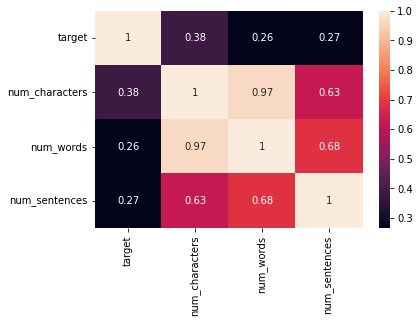

In [36]:
sns.heatmap(df.corr(),annot=True)

## 3. Data Preprocessing
1. Lowercase
2. Tokenization
3. Removing speacial Characters
4. Removing stop words and punctuation
5. Stemming


In [37]:
from nltk.corpus import stopwords
nltk.download("stopwords")
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [38]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [39]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [40]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [41]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point avail bugi n great world la e buffet cine got amor wat'

In [42]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [43]:
df['transformed_text'] = df['text'].apply(transform_text)

In [44]:
df.head(3)

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...


In [45]:
from wordcloud import WordCloud
wc  = WordCloud(width = 800,height = 800,min_font_size=10,background_color='white')

In [46]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

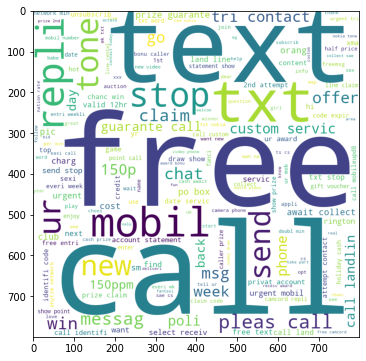

In [47]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [48]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

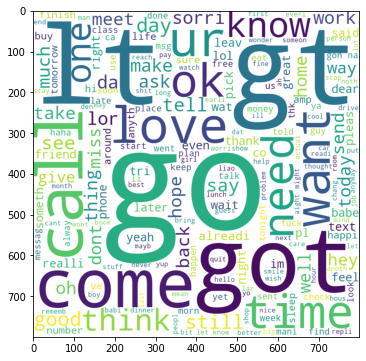

In [49]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [50]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [51]:
len(spam_corpus)

9883

In [52]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 189),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('prize', 82),
 ('4', 76),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 50),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

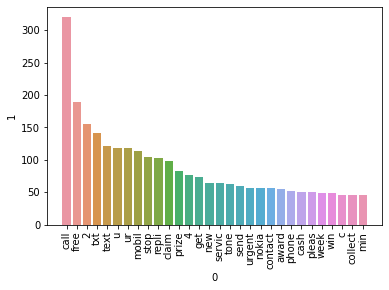

In [53]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation =  'vertical')
plt.plot()

In [54]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)


In [55]:
len(ham_corpus)

34771

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


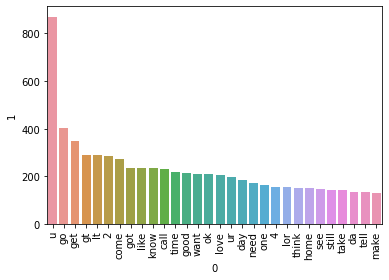

In [56]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

## Model Building

In [57]:
# Text vectorization using bag of word
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [58]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [59]:
X.shape

(5169, 6629)

In [60]:
y = df['target'].values

In [61]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)

In [63]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score

In [64]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [65]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.874274661508704
[[786 110]
 [ 20 118]]
0.5175438596491229


In [66]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.965183752417795
[[872  24]
 [ 12 126]]
0.84


In [67]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9709864603481625
[[893   3]
 [ 27 111]]
0.9736842105263158


## do same thing using TF-IDF

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [69]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [70]:
X.shape

(5169, 6629)

In [71]:
y = df['target'].values

In [72]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)

In [74]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score

In [75]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [76]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8704061895551257
[[787 109]
 [ 25 113]]
0.509009009009009


In [77]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


# As you can see here using tfidf and mulinominalNB classifer we are getting good accuracy and precision score, as our model is highly based on precesion score and here we are getting 100% score , 0 FP rate. therefore, we are going to use this model

In [78]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9709864603481625
[[893   3]
 [ 27 111]]
0.9736842105263158


## let's try different models and check performance


In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier,BaggingClassifier
from xgboost import XGBClassifier

In [80]:
svc = SVC(kernel='sigmoid',gamma = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state= 2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [81]:
clfs ={
    'SVC':svc,
    'KN':knc,
    'NB': mnb,
    'DT':dtc,
    'RF':rfc,
    'LR':lrc,
    'AdaBoost':abc,
    'Bgc':bc,
    'ETC':etc,
    'gbdt':gbdt,
    'xgb': xgb
}

In [82]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)

  return accuracy,precision

In [83]:
train_classifier(etc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [84]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
  current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
  
  print('For',name)
  print('Accuracy - ',current_accuracy)
  print('Precision - ',current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For SVC
Accuracy -  0.9729206963249516
Precision -  0.9661016949152542
For KN
Accuracy -  0.9003868471953579
Precision -  1.0
For NB
Accuracy -  0.9593810444874274
Precision -  1.0
For DT
Accuracy -  0.9342359767891683
Precision -  0.8301886792452831
For RF
Accuracy -  0.97678916827853
Precision -  0.9913793103448276
For LR
Accuracy -  0.9526112185686654
Precision -  0.9320388349514563
For AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9298245614035088
For Bgc
Accuracy -  0.960348162475822
Precision -  0.875968992248062
For ETC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For gbdt
Accuracy -  0.9516441005802708
Precision -  0.8928571428571429
For xgb
Accuracy -  0.9506769825918762
Precision -  0.9142857142857143


In [85]:
perfromance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [86]:
perfromance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
4,RF,0.976789,0.991379
8,ETC,0.975822,0.974790
0,SVC,0.972921,0.966102
5,LR,0.952611,0.932039
6,AdaBoost,0.961315,0.929825
10,xgb,0.950677,0.914286
9,gbdt,0.951644,0.892857
7,Bgc,0.960348,0.875969


In [87]:
performance_df1 = pd.melt(perfromance_df,id_vars = 'Algorithm')

In [88]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,RF,Accuracy,0.976789
3,ETC,Accuracy,0.975822
4,SVC,Accuracy,0.972921
5,LR,Accuracy,0.952611
6,AdaBoost,Accuracy,0.961315
7,xgb,Accuracy,0.950677
8,gbdt,Accuracy,0.951644
9,Bgc,Accuracy,0.960348


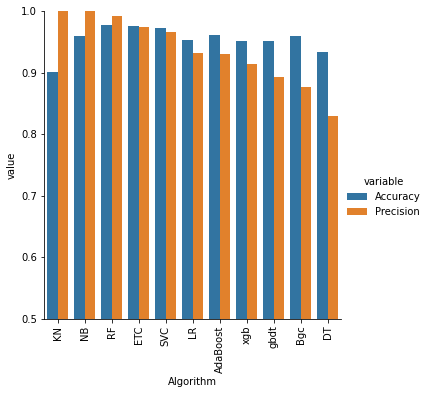

In [89]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar')
plt.ylim(0.5,1.0)
plt.xticks(rotation = 'vertical')
plt.show()

## Try to improve the model performance

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [115]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [116]:
X.shape

(5169, 3000)

In [117]:
y = df['target'].values 

In [118]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [119]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)

In [120]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [97]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.867504835589942
[[785 111]
 [ 26 112]]
0.5022421524663677


In [121]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9729206963249516
[[896   0]
 [ 28 110]]
1.0


In [99]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9816247582205029
[[895   1]
 [ 18 120]]
0.9917355371900827


In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier,BaggingClassifier
from xgboost import XGBClassifier

In [101]:
svc = SVC(kernel='sigmoid',gamma = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state= 2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [102]:
clfs ={
    'SVC':svc,
    'KN':knc,
    'NB': mnb,
    'DT':dtc,
    'RF':rfc,
    'LR':lrc,
    'AdaBoost':abc,
    'Bgc':bc,
    'ETC':etc,
    'gbdt':gbdt,
    'xgb': xgb
}

In [103]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)

  return accuracy,precision

In [104]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
  current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
  
  print('For',name)
  print('Accuracy - ',current_accuracy)
  print('Precision - ',current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For SVC
Accuracy -  0.9748549323017408
Precision -  0.9666666666666667
For KN
Accuracy -  0.9052224371373307
Precision -  1.0
For NB
Accuracy -  0.9729206963249516
Precision -  1.0
For DT
Accuracy -  0.9342359767891683
Precision -  0.85
For RF
Accuracy -  0.971953578336557
Precision -  0.9739130434782609
For LR
Accuracy -  0.9574468085106383
Precision -  0.9519230769230769
For AdaBoost
Accuracy -  0.9642166344294004
Precision -  0.9316239316239316
For Bgc
Accuracy -  0.9545454545454546
Precision -  0.8527131782945736
For ETC
Accuracy -  0.9777562862669246
Precision -  0.9831932773109243
For gbdt
Accuracy -  0.9487427466150871
Precision -  0.9292929292929293
For xgb
Accuracy -  0.9468085106382979
Precision -  0.946236559139785


In [111]:
performance_df2 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_3000':accuracy_scores,'Precision_3000':precision_scores}).sort_values('Precision_3000',ascending=False)

In [112]:
performance_df2

,Algorithm,Accuracy_3000,Precision_3000
1,KN,0.905222,1.000000
2,NB,0.972921,1.000000
8,ETC,0.977756,0.983193
4,RF,0.971954,0.973913
0,SVC,0.974855,0.966667
5,LR,0.957447,0.951923
10,xgb,0.946809,0.946237
6,AdaBoost,0.964217,0.931624
9,gbdt,0.948743,0.929293
7,Bgc,0.954545,0.852713


In [113]:
perfromance_df.merge(performance_df2,on='Algorithm') # clearly see that performance of NB has increased and FP is also 0.

,Algorithm,Accuracy,Precision,Accuracy_3000,Precision_3000
0,KN,0.900387,1.000000,0.905222,1.000000
1,NB,0.959381,1.000000,0.972921,1.000000
2,RF,0.976789,0.991379,0.971954,0.973913
3,ETC,0.975822,0.974790,0.977756,0.983193
4,SVC,0.972921,0.966102,0.974855,0.966667
5,LR,0.952611,0.932039,0.957447,0.951923
6,AdaBoost,0.961315,0.929825,0.964217,0.931624
7,xgb,0.950677,0.914286,0.946809,0.946237
8,gbdt,0.951644,0.892857,0.948743,0.929293
9,Bgc,0.960348,0.875969,0.954545,0.852713


In [122]:
import pickle

pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

